In [23]:
import os

if "notebooks" in os.getcwd():
    %cd ..
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from src.utils.defines import INTERIM_DATA_DIR, AUGMENTED_DATA_DIR
import matplotlib.patches as mpatches

In [48]:
data_root = Path("data", "edos_raw").resolve().as_posix()
train_df = pd.read_csv(os.path.join(INTERIM_DATA_DIR, "train.csv"))
train_aug_insertion = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_insertion_emb.csv"))
train_aug_synonym = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_synonym_replacement_emb.csv"))
train_rand_swap = pd.read_csv(os.path.join(AUGMENTED_DATA_DIR, "train_augmented_random_swap.csv"))

C:\Users\jibao\AppData\Local\Temp\ipykernel_21060\513276512.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
C:\Users\jibao\AppData\Local\Temp\ipykernel_21060\513276512.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))


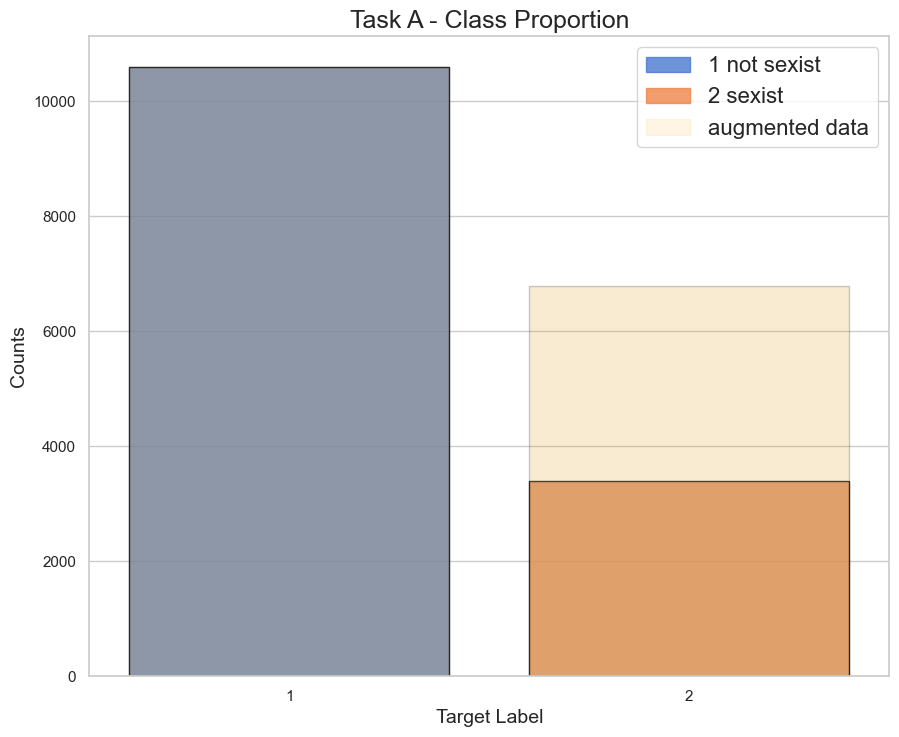

In [42]:
# Explore task a
# train_task_a = train_df.drop(['rewire_id', 'target_b', 'target_c'], axis=1)
train_task_a = train_df.copy()

# augment a
a1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_a'] == 1]
a1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_a'] == 1]

orig_len = len(a1_aug_syn)

aug_task_a = pd.concat([train_task_a,
                        a1_aug_insertion.sample(int(orig_len * 1)),
                        a1_aug_syn.sample(int(orig_len * 0))])

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task A - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_a['target_a'].value_counts()
counts1 = aug_task_a['target_a'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

sns.barplot(x=counts1.index, y=counts1.values, order=counts1.index, color='orange',
            edgecolor="black", alpha=0.2)

labels = ['1 not sexist', '2 sexist']
labels_axis = ['1', '2']
plt.xticks([0, 1], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for i, (label, color) in enumerate(zip(labels, palette)):
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))
    if i == 1:
        # Add a separate bar for augmented data
        proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

aug_task_a.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_a.csv"), index=False)
# plt.savefig('TaskA-ClassProportion.png', dpi=500)

In [32]:
a1_aug_syn

,rewire_id,text,target_a,target_b,target_c
4,sexism2022_english-7228,[USER] Leg day is easy. Hot girls just wear mi...,1,2,7
6,sexism2022_english-872,I get a new pussy every other week or whenever...,1,1,4
11,sexism2022_english-14992,O come on there's no way any man are attracted...,1,1,4
21,sexism2022_english-7260,Former BBC staffer Thuto Mali says that univer...,1,3,10
25,sexism2022_english-7022,I did. You want to have the bravery to escalat...,1,0,1
...,...,...,...,...,...
13968,sexism2022_english-5506,The drama baby is just another open borders cr...,1,1,3
13985,sexism2022_english-17659,This is easily the dumbest thing ever written....,1,1,4
13986,sexism2022_english-13737,Recently some thots started advertizing their ...,1,2,5
13988,sexism2022_english-8065,I wish yall understand what a burden it can be...,1,1,3


In [149]:
# Explore task b
# train_task_b = train_df.drop(['rewire_id', 'target_a', 'target_c'], axis=1)
train_task_b = train_df.copy()
train_task_b = train_task_b.loc[train_task_b['target_b'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
b1_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 0]
print(f"threats, plans to harm and incitement: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
b4_aug_swap = train_rand_swap.loc[train_rand_swap['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion, b1_aug_syn,
                        b1_aug_swap.sample(int(len(b1)*1)),
                        b2_aug_insertion.sample(int(len(b2)*0)),
                        b2_aug_syn.sample(int(len(b2)*0)),
                        b3_aug_insertion.sample(int(len(b3)*0.2)),
                        b3_aug_syn.sample(int(len(b3)*0)),
                        b4_aug_syn, b4_aug_insertion,
                        b4_aug_swap.sample(int(len(b4)*1))])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(aug_task_b)/len(train_task_b)}")

# aug_task_b.to_csv(Path(AUGMENTED_DATA_DIR, f"augmented_task_b.csv"), index=False)

threats, plans to harm and incitement: 310
derogation: 1590
animosity: 1165
prejudiced discussions: 333
total sexist task b: 3398
augmented dataset b count: 5560, aug ratio: 1.6362566215420835


C:\Users\jibao\AppData\Local\Temp\ipykernel_21060\3605724708.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
C:\Users\jibao\AppData\Local\Temp\ipykernel_21060\3605724708.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))


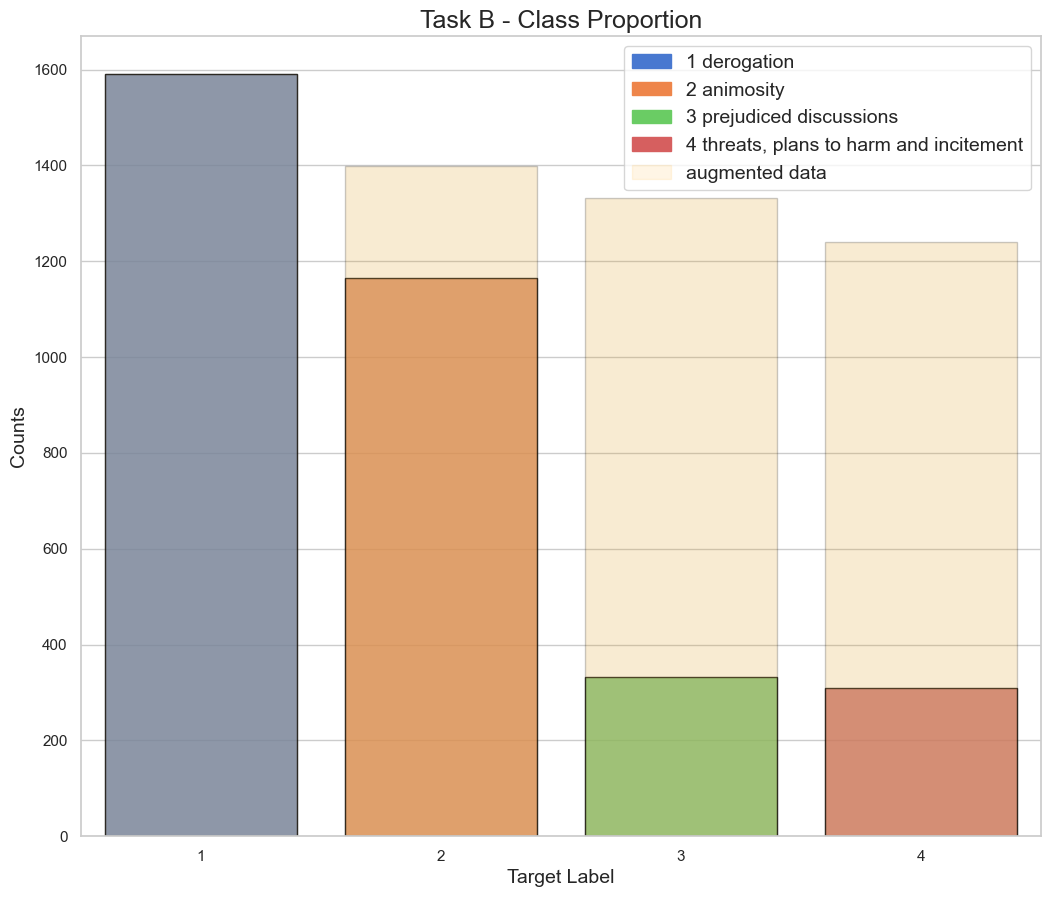

In [150]:
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task B - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_b['target_b'].value_counts()
counts1 = aug_task_b['target_b'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)
counts1 = counts1.reindex([1,2,3,0])


# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

sns.barplot(x=counts1.index, y=counts1.values, order=counts1.index, color='orange',
            edgecolor="black", alpha=0.2)

labels = ['1 derogation', '2 animosity', '3 prejudiced discussions', '4 threats, plans to harm and incitement']
labels_axis = ['1', '2', '3', '4']
plt.xticks([0, 1, 2, 3], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for i, (label, color) in enumerate(zip(labels, palette)):
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=1))
    if i == 3:
        # Add a separate bar for augmented data
        proxy_artists.append(mpatches.Patch(color='orange', label="augmented data", edgecolor='black', alpha=0.1))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=14, bbox_to_anchor=(1.0, 1.0))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# plt.savefig('TaskB-ClassProportion_aug.png', dpi=500)

In [115]:
counts1

1    1590
3    1332
0    1240
2    1165
Name: target_b, dtype: int64

In [103]:
# Explore task c
train_task_c = train_df.drop(['rewire_id', 'target_a', 'target_b'], axis=1)
train_task_c = train_task_c.loc[train_task_c['target_c'] != -1]

b1 = train_task_b.loc[train_task_b['target_b'] == 0]
b1_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 0]
b1_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 0]
print(f"1.1: {len(b1)}")

b2 = train_task_b.loc[train_task_b['target_b'] == 1]
b2_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 1]
b2_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 1]
print(f"derogation: {len(b2)}")

b3 = train_task_b.loc[train_task_b['target_b'] == 2]
b3_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 2]
b3_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 2]
print(f"animosity: {len(b3)}")

b4 = train_task_b.loc[train_task_b['target_b'] == 3]
b4_aug_syn = train_aug_synonym.loc[train_aug_synonym['target_b'] == 3]
b4_aug_insertion = train_aug_insertion.loc[train_aug_insertion['target_b'] == 3]
print(f"prejudiced discussions: {len(b4)}")

print(f"total sexist task b: {len(pd.concat([b1, b2, b3, b4]))}")

aug_task_b = pd.concat([train_task_b,
                        b1_aug_insertion, b1_aug_syn,
                        b2_aug_insertion.sample(int(len(b2)*0.5)),
                        b3_aug_insertion.sample(int(len(b3)*0.5)),
                        b4_aug_syn, b4_aug_insertion])

print(f"augmented dataset b count: {len(aug_task_b)}, aug ratio: {len(train_task_b)/len(aug_task_b)*100}")

threats, plans to harm and incitement: 310
derogation: 1590
animosity: 1165
prejudiced discussions: 333
total sexist task b: 3398
augmented dataset b count: 6061, aug ratio: 56.06335588186768


1.1 threats of harm
1.2 incitement and encouragement of harm
2.1 descriptive attacks
2.2 aggressive and emotive attacks
2.3 dehumanising attacks & overt sexual objectification
3.1 casual use of gendered slurs, profanities, and insults
3.2 immutable gender differences and gender stereotypes
3.3 backhanded gendered compliments
3.4 condescending explanations or unwelcome advice
4.1 supporting mistreatment of individual women


C:\Users\jibao\AppData\Local\Temp\ipykernel_38284\2394599675.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))


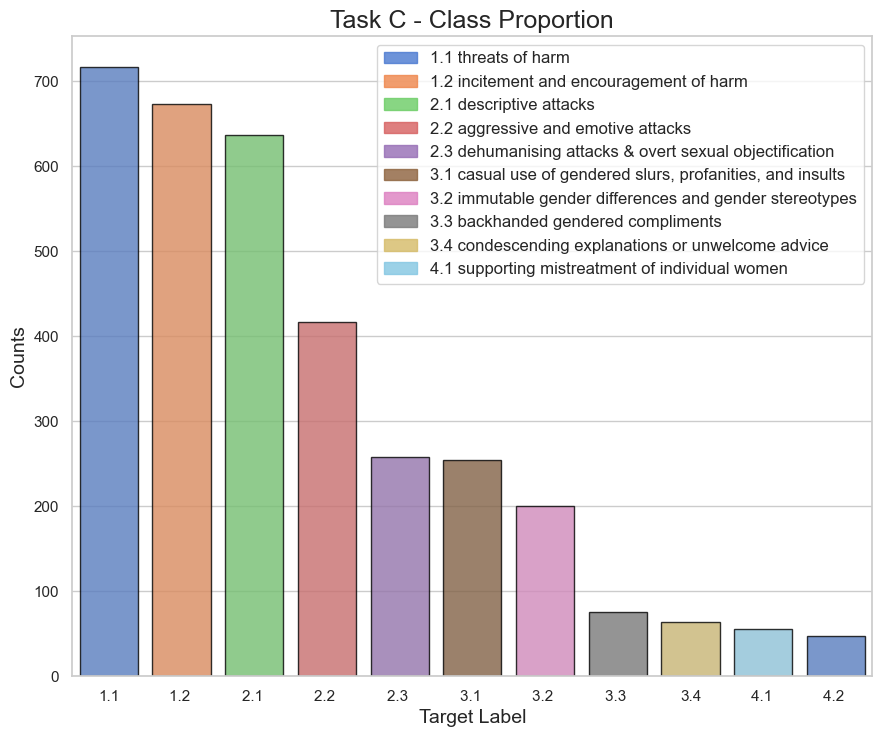

In [115]:
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

plt.ylabel("Counts", size=14)
plt.xlabel("Target Label", size=14)
plt.title("Task C - Class Proportion", size=18)

# Count the number of occurrences of each class label
counts = train_task_c['target_c'].value_counts()

# Sort the counts in descending order
counts = counts.sort_values(ascending=False)

# Create a bar plot using Seaborn
palette = sns.color_palette("muted")
sns.barplot(x=counts.index, y=counts.values, order=counts.index, palette=palette,
            edgecolor="black", alpha=0.8)

labels = ["1.1 threats of harm",
          "1.2 incitement and encouragement of harm",
          "2.1 descriptive attacks",
          "2.2 aggressive and emotive attacks",
          "2.3 dehumanising attacks & overt sexual objectification",
          "3.1 casual use of gendered slurs, profanities, and insults",
          "3.2 immutable gender differences and gender stereotypes",
          "3.3 backhanded gendered compliments",
          "3.4 condescending explanations or unwelcome advice",
          "4.1 supporting mistreatment of individual women",
          "4.2 supporting systemic discrimination against women as a group"]

labels_axis = [
    "1.1",
    "1.2 ",
    "2.1 ",
    "2.2 ",
    "2.3 ",
    "3.1 ",
    "3.2 ",
    "3.3 ",
    "3.4",
    "4.1 ",
    "4.2 "
]

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels_axis)

# Create proxy artists for the legend
proxy_artists = []
for label, color in zip(labels, palette):
    print(label)
    proxy_artists.append(mpatches.Patch(color=color, label=label, edgecolor='black', alpha=0.8))

# Create the legend
plt.legend(handles=proxy_artists, loc='upper right', fontsize=12)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
# plt.savefig('TaskC-ClassProportion.png', dpi=500)

In [117]:
for label, color in zip(labels, palette):
    print(label)


1.1 threats of harm
1.2 incitement and encouragement of harm
2.1 descriptive attacks
2.2 aggressive and emotive attacks
2.3 dehumanising attacks & overt sexual objectification
3.1 casual use of gendered slurs, profanities, and insults
3.2 immutable gender differences and gender stereotypes
3.3 backhanded gendered compliments
3.4 condescending explanations or unwelcome advice
4.1 supporting mistreatment of individual women
